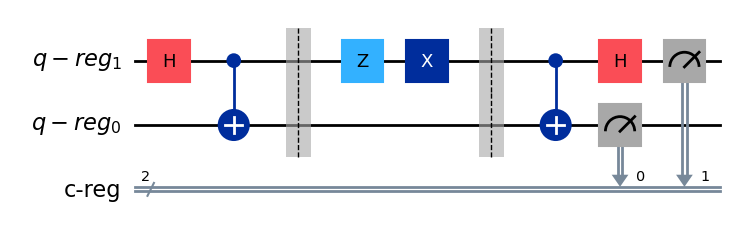

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#Create circuit:
q = QuantumRegister(2, 'q-reg')
c = ClassicalRegister(2, 'c-reg')
qc = QuantumCircuit(q,c)

#Create a bell state:
qc.h(q[1])
qc.cx(q[1],q[0])
qc.barrier()

# Encode input:
c_inp = '11'
if c_inp[0] == '1':
    qc.z(q[1])
if c_inp[1] == '1':
    qc.x(q[1])
qc.barrier()

# Decoding by Bob:
qc.cx(q[1],q[0])
qc.h(q[1])
qc.measure(q,c)

qc.draw(output='mpl', reverse_bits=True)

{'11': 100}


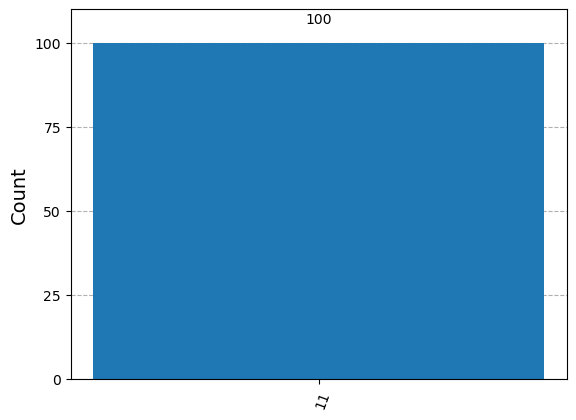

In [18]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

job = AerSimulator().run(qc, shots=100)
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)